### Простая регрессия

#### Линейная регрессия с помощью scikit-learn

m = [1.93939394]
b = [4.73333333]


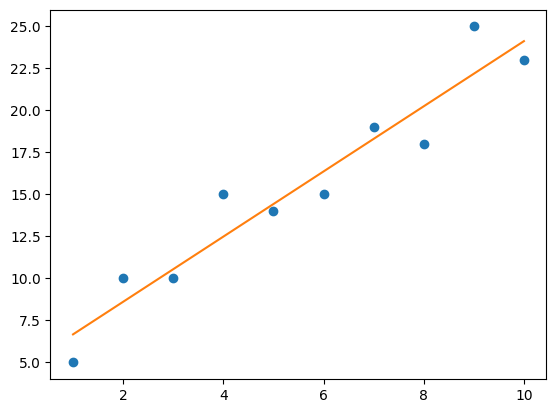

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=',')

X = df.values[:, :-1]

Y = df.values[:, -1]

fit = LinearRegression().fit(X, Y)

m = fit.coef_.flatten()
b = fit.intercept_.flatten()

print(f"m = {m}") # 1.(93)
print(f"b = {b}") # 4.7(3)

plt.plot(X, Y, 'o')
plt.plot(X, m*X+b)
plt.show()

#### Вычисление остатков между прямой и точками даных

**Остаток** - это разность между прогнозируемым значением `y` (которое лежит на прямой) и фактическим значением (из набора данных).

In [2]:
import pandas as pd

points = pd.read_csv('https://bit.ly/3goOAnt', delimiter=',').itertuples()

m = 1.93939394
b = 4.73333333

for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual = y_actual - y_predict
    print(residual)

-1.6727272699999993
1.3878787900000003
-0.5515151500000002
2.509090910000001
-0.43030303000000103
-1.3696969699999997
0.6909090900000017
-2.2484848500000005
2.812121210000001
-1.1272727300000014


##### Как изменирить "итоговый разрыв"?
Лучше всего оценить его как **сумму квадратов** всех остатков.
##### Почему не использовть абсолютные велечины?
Абсолютные значения плохо сочетаются с производными, которые дальше будут использоваться для градиентного спуска.

#### Вычисление суммы квадратов остатков для заданной прямой и данных

In [3]:
points = pd.read_csv('https://bit.ly/2KF29Bd').itertuples()

m = 1.93939394
b = 4.73333333

sum_of_squares = 0.0

for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual_squated = (y_predict - y_actual)**2
    sum_of_squares += residual_squated

print(f"Сумма квадратов = {sum_of_squares}")

Сумма квадратов = 28.096969696969715


#### Градиентный спуск для нахождения минимума функций

Список функций
1. Синусо-квадратичная
2. Абсолютная и линейная
3. Экспоненциально-квадратичная
4. Модифицированный Растригин
5. Кубическая

**Скорость обучения** - это фактически доля от углового коэффициента, которая вычисляется из значения x на каждой итерации.

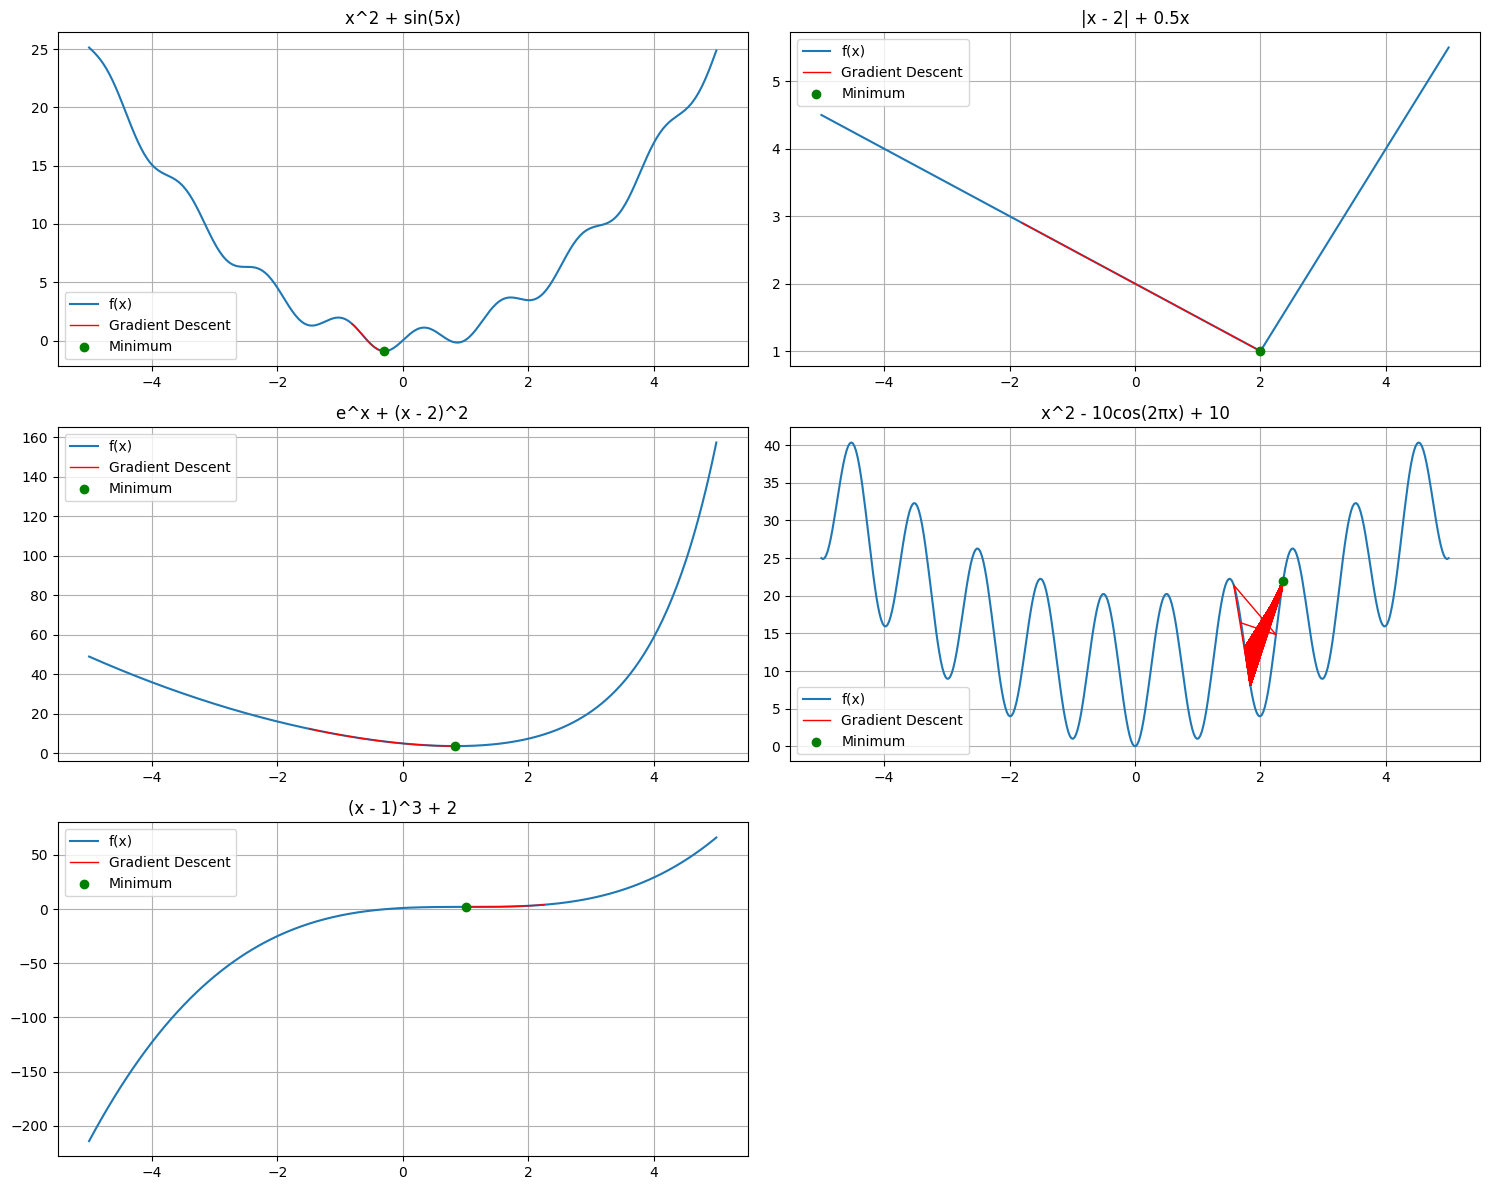

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Список функций и их производных
functions = [
    {
        "name": "x^2 + sin(5x)",
        "f": lambda x: x**2 + np.sin(5 * x),
        "df": lambda x: 2 * x + 5 * np.cos(5 * x)
    },
    {
        "name": "|x - 2| + 0.5x",
        "f": lambda x: np.abs(x - 2) + 0.5 * x,
        "df": lambda x: 1 + 0.5 if x > 2 else (-1 + 0.5 if x < 2 else 0)
    },
    {
        "name": "e^x + (x - 2)^2",
        "f": lambda x: np.exp(np.clip(x, -100, 100)) + (x - 2) ** 2,
        "df": lambda x: np.exp(np.clip(x, -100, 100)) + 2 * (x - 2)
    },
    {
        "name": "x^2 - 10cos(2πx) + 10",
        "f": lambda x: x ** 2 - 10 * np.cos(2 * np.pi * x) + 10,
        "df": lambda x: 2 * x + 20 * np.pi * np.sin(2 * np.pi * x)
    },
    {
        "name": "(x - 1)^3 + 2",
        "f": lambda x: (x - 1) ** 3 + 2,
        "df": lambda x: 3 * (x - 1) ** 2
    }
]

# Градиентный спуск
results = []
for func in functions:
    f = func["f"]
    df = func["df"]
    x = np.random.uniform(-3, 3)  # более узкий безопасный диапазон
    L = 0.01
    steps = 2000
    trajectory = [x]

    for _ in range(steps):
        try:
            grad = df(x)
            if not np.isfinite(grad) or abs(grad) > 1e6:
                break  # остановить, если градиент слишком большой или нечисловой
            x -= L * grad
            trajectory.append(x)
        except OverflowError:
            break

    final_x = x
    final_y = f(x)
    trajectory_y = [f(xi) for xi in trajectory]

    results.append({
        "name": func["name"],
        "x_vals": np.linspace(-5, 5, 400),
        "y_vals": f(np.linspace(-5, 5, 400)),
        "trajectory": trajectory,
        "trajectory_y": trajectory_y,
        "final_x": final_x,
        "final_y": final_y
    })

# Отображение всех графиков
fig, axs = plt.subplots(3, 2, figsize=(15, 12))
axs = axs.flatten()

for i, res in enumerate(results):
    ax = axs[i]
    ax.plot(res["x_vals"], res["y_vals"], label="f(x)")
    ax.plot(res["trajectory"], res["trajectory_y"], label="Gradient Descent", color="red", linewidth=1)
    ax.scatter([res["final_x"]], [res["final_y"]], color="green", label="Minimum", zorder=5)
    ax.set_title(res["name"])
    ax.legend()
    ax.grid(True)

axs[-1].axis('off')  # Последняя ячейка остаётся пустой (5 графиков)
plt.tight_layout()
plt.show()
